In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import norm
import scipy.integrate as integrate

In [12]:
# Generate data
np.random.seed(2)
size = 100
mu = np.random.normal(0,1,size=size)
sigma = 1
X = np.random.normal(mu,sigma,size=size)

In [13]:
def prior_mu(mu):
    density = norm.pdf(mu, loc=0, scale=1)
    return density

def likelihood_x(x,mu):
    density = norm.pdf(x, loc=mu, scale=1)
    return density

def likelihood_X(X,mu):
    res = 1
    for point in X:
        res *= likelihood_x(point,mu)
    return res

def likelihood_times_prior_mu(X,mu):
    return likelihood_X(X,mu) * prior_mu(mu)

def prior_X(X):
    res = integrate.quad(lambda mu: likelihood_times_prior_mu(X,mu),a=-np.inf,b=np.inf)[0]
    return res

def joint_posterior(x,mu,X):
    res = likelihood_x(x,mu) * likelihood_X(X,mu) * prior_mu(mu) / prior_X(X)
    return res

def joint_posterior_without_normalizing_constant(x,mu,X):
    res = likelihood_x(x,mu) * likelihood_X(X,mu) * prior_mu(mu)
    return res

In [14]:
# Build grid for plotting

mu_plot = linspace(-2,2,50)
x_plot = linspace(-2,2,50)

grid = np.zeros((50,50))
X_coords = linspace(-1,1,50)
Y_coords = linspace(-4,4,50)

for index_i,i in enumerate(x_plot):
    for index_j,j in enumerate(mu_plot):
        grid[index_i,index_j] = joint_posterior_without_normalizing_constant(i,j,X)
        
#grid = [[joint_posterior_without_normalizing_constant(i,j,X) for index_j,j in enumerate(mu_plot)] for index_i,i in enumerate(x_plot)]

Text(0, 0.5, 'x')

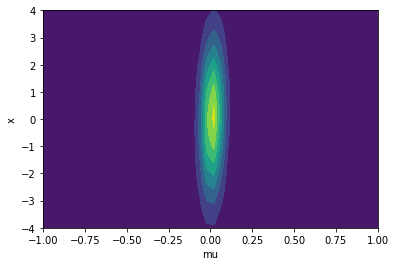

In [15]:
cnt = contourf(X_coords, Y_coords, grid)
plt.xlabel('mu')
plt.ylabel('x')

In [242]:
joint_posterior(-1.5,1,X)

9.248179095334775e-23